# Introduction
https://www.tensorflow.org/versions/r0.11/get_started/index.html

今回は深層学習の話から一旦離れて、今まで天下り的に「Tensorflowではこのように書きます」って説明してきた部分をちゃんと説明する回にしたいと思います。
Tensor flowというシステムにおける設計思想や基本的な文法を学びましょう！

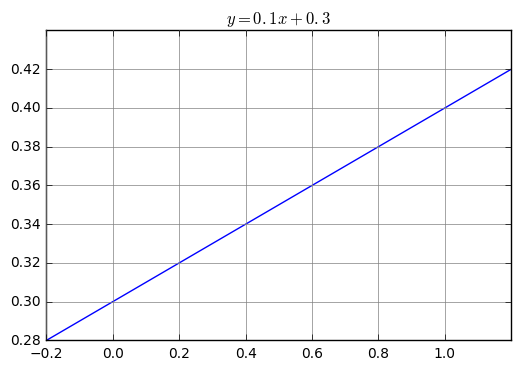

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

xmin, xmax = -0.2, 1.2
step = 0.1
x = np.arange(xmin, xmax+step, step)
y = 0.1 * x + 0.3
plt.title(r"$y = 0.1x + 0.3$")
plt.xlim(xmin, xmax)
plt.grid(color='gray',linestyle='-')
plt.ylim(0.28, 0.44)
plt.plot(x, y)

In [44]:
import tensorflow as tf
from numpy.random import *

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = [y + normal(0, 0.005) for y in 0.1 * x_data + 0.3]

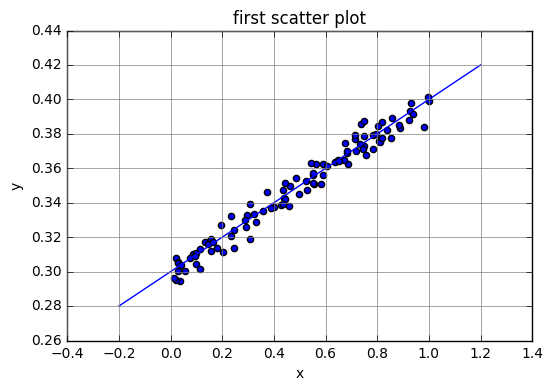

In [46]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
ax.set_title('first scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(x, y)
plt.grid(color='gray',linestyle='-')

fig.show()

In [ ]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

ValueError: x and y must have same first dimension

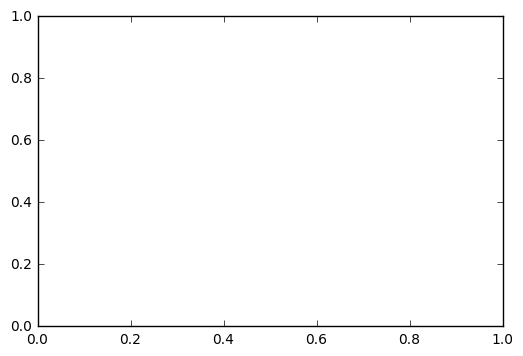

In [47]:
xmin, xmax = -0.2, 1.2
step = 0.1
x = np.arange(xmin, xmax+step, step)
y = W[0] * x + b[0]
plt.plot(x, y)

In [39]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(301):
    sess.run(train)
    if step % 50 == 0:
        W_ = sess.run(W)
        b_ = sess.run(b)
        print(step, W_, b_)

# Learns best fit is W: [0.1], b: [0.3]
print(W_, b_)

0 [ 0.5324775] [ 0.08205361]
50 [ 0.11907319] [ 0.28981]
100 [ 0.10015941] [ 0.30020139]
150 [ 0.09927664] [ 0.30068639]
200 [ 0.09923544] [ 0.30070904]
250 [ 0.09923355] [ 0.30071005]
300 [ 0.09923355] [ 0.30071005]
[ 0.09923355] [ 0.30071005]
